# Production Returning, Leaving, Incoming Plot Book

In [258]:
# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase
from PIL import Image


# path to TEMP folder
temp_folder = os.path.join(os.getcwd(), '..', 'TEMP')
# Data folder
data_folder = os.path.join(os.getcwd(), '..', 'data')
# Image folder
img_folder = os.path.join(os.getcwd(), '..', 'images')
# Logo folder
logo_folder = os.path.join(os.getcwd(), '..', 'images', 'logos')

# Path to FInal Pairwise Ranking From Last Season (2023-24) 
## For Use in sorting charts later potentially
pairwise_file = os.path.join(data_folder, 'final_pairwise_202324.csv')
pairwise_df = pd.read_csv(pairwise_file) # Load DF

# Path to school info [for logo mappiung] table (csv)
school_info_file = os.path.join(data_folder, 'arena_school_info.csv')
school_info_df = pd.read_csv(school_info_file)

# Load calculated table (csv)
calculated_file = os.path.join(temp_folder, 'final_team_production_sorted_v1.03.csv')
df = pd.read_csv(calculated_file)


# Path to calculated table (csv)

In [259]:
df.head()
# school_info_df.head()
pairwise_df.head()

,Rk,Team,PCWs,RPI,Rk_1,QWB-†,W-L-T,PwWin %,Wgtd Win % - ‡
0,1,Boston College,63,0.6298,1,0.0102,31-5-1 (2-0),0.8333,0.8324
1,2,Boston University,62,0.6046,2,0.0083,26-9-2 (2-3),0.7387,0.7467
2,3,Denver,61,0.5976,3,0.0076,28-9-3 (3-1),0.7208,0.7214
3,4,Michigan State,60,0.5906,4,0.0075,24-9-3 (0-1),0.7176,0.7226
4,5,Maine,58,0.5739,6,0.0053,23-11-2 (1-1),0.6667,0.6740


### Clean the Pairwise Table
- remove . in names
- replace - with spaces

In [260]:
## Clean up name sin Pairwaise DF for matching
pairwise_df['Team'] = pairwise_df['Team'].str.replace('.', '')
pairwise_df['Team'] = pairwise_df['Team'].str.replace('-', ' ')

## Conference Dictionaries - Styles, Colors, Ect

In [261]:
## Conference Membership

atlantic = ['Air Force', "American Intl", 'Army', 'Bentley', 'Canisius', 'Holy Cross', 'Mercyhurst', 
            'Niagara', 'RIT', 'Robert Morris', 'Sacred Heart', 'St Lawrence']

big_ten = ['Michigan', 'Michigan State', 'Minnesota', 'Notre Dame', 'Ohio State', 'Penn State', 'Wisconsin']

ccha = ['Augustana', 'Bemidji State', 'Bowling Green', 'Ferris State', 'Lake Superior', 'Michigan Tech', 
        'Minnesota State', 'Northern Michigan', 'St Thomas']

ecac = ['Brown', 'Clarkson', 'Colgate', 'Cornell', 'Dartmouth', 'Harvard', 'Princeton', 'Quinnipiac',
        'Rensselaer', 'St Lawrence', 'Union', 'Yale']

hockey_east = ['Boston College', 'Boston University', 'Connecticut', 'Maine', 'Massachusetts', 'Mass Lowell',
                'Merrimack', 'New Hampshire', 'Northeastern', 'Providence', 'Vermont']

nchc = ['Arizona State', 'Colorado College', 'Denver', 'Miami', 'Minnesota Duluth', 'North Dakota', 'Omaha', 'St Cloud State',
        'Western Michigan']

independents = ['Alaska Anchorage', 'Alaska', 'Lindenwood', 'Long Island', 'Stonehill']

# Create a dictionary of {Team: logo_abv} for each team with .png added to the end
logo_mapping = {}

for index, row in school_info_df.iterrows():
    logo_mapping[row['Team']] = row['logo_abv'] + '.png'

# print(logo_mapping)


### Reorder each conference based on Final 2023-24 Pairwise Ranking

#### Add Logos to Plot Function

In [262]:
def add_logos_to_plot(data_df, x_col, y_col, logo_mapping, logo_folder, ax, teams_in_region):
    for team in teams_in_region:
        team_data = data_df[data_df['Team'] == team]
        if not team_data.empty:
            x = team_data[x_col].values[0]
            y = team_data[y_col].values[0]
            logo_path = os.path.join(logo_folder, logo_mapping.get(team, ""))

            # Add this print statement to check the file paths
            print(f"Attempting to load logo for {team}: {logo_path}")
            
            if logo_path:
                try:
                    logo_img = plt.imread(logo_path)
                    imagebox = OffsetImage(logo_img, zoom=0.15)  # Adjust zoom as needed
                    ab = AnnotationBbox(imagebox, (x, y), frameon=False, xybox=(10, 20), boxcoords="offset points", pad=0)
                    ax.add_artist(ab)
                except Exception as e:
                    print(f"Error adding logo for {team}: {e}")  # Add this exception handling


##### Style

In [263]:
figure_size = (10, 10)


## FONT SETTINGS
font_properties = {'fontsize': 24, 'fontweight': 'bold', 'family': 'Verdana'}  # You can change 'serif' to any font family you prefer


color_scheme = {
    'Returning Goals': '#2E8B57',  # Dark Green
    'Returning Assists': '#90EE90',  # Light Green
    'Departed Goals': '#B22222',  # Dark Red
    'Departed Assists': '#FF7F7F',  # Light Red
    'New Goals': '#1E90FF',  # Dark Blue
    'New Assists': '#87CEFA'  # Light Blue
}

# Plot

In [264]:
# Fix the add_logos_to_plot function to avoid KeyError
def add_logos_to_plot(data_df, team_names, logo_mapping, logo_folder, ax, bar_width):
    for i, team in enumerate(team_names):
        logo_file = logo_mapping.get(team, "")
        if logo_file:
            logo_path = os.path.join(logo_folder, logo_file)
            try:
                logo_img = plt.imread(logo_path)
                imagebox = OffsetImage(logo_img, zoom=0.175)  # Adjust zoom as needed
                # Adjust the positioning of logos below the x-axis
                ab = AnnotationBbox(imagebox, (i + bar_width / 2, -0.055), xycoords=('data', 'axes fraction'), frameon=False)
                ax.add_artist(ab)
            except Exception as e:
                print(f"Error adding logo for {team}: {e}")

# Define the function to create the stacked bar chart for each conference
def plot_conference_production(df, conference_teams, conference_name, logo_mapping, logo_folder, ax=None, conference_logo=None):
    """
    Function to create a stacked bar chart for team production in a specific conference.

    Parameters:
    - df: DataFrame containing team production data.
    - conference_teams: List of teams in the conference.
    - conference_name: Name of the conference.
    - logo_mapping: Dictionary mapping teams to their logo filenames.
    - logo_folder: Path to the folder containing the logos.
    - ax: Optional Matplotlib axis object for plotting. If None, a new plot will be created.
    """
    
    # Filter the dataframe for teams in the conference
    filtered_df = df[df['Team'].isin(conference_teams)]

    # Order the teams based on their RK in the pairwise_df
    filtered_df['Rk'] = filtered_df['Team'].map(pairwise_df.set_index('Team')['Rk'])
    filtered_df = filtered_df.sort_values(by='Rk')
    
    # Check if ax is provided, otherwise create a new figure and axis
    if ax is None:
        fig, ax = plt.subplots(figsize=figure_size)

    # Extract the data needed for the plot
    team_names = filtered_df['Team'].tolist()
    g_returning = filtered_df['g_Returning'].values
    a_returning = filtered_df['a_Returning'].values
    g_departed = filtered_df['g_Departed'].values
    a_departed = filtered_df['a_Departed'].values
    incoming_g = filtered_df['incoming_g'].values
    incoming_a = filtered_df['incoming_a'].values

    # Plot the first stack (returning and departed goals/assists)
    bottom_values = np.zeros(len(team_names))
    bar_width = 0.45  # Adjustable bar width for fine-tuning spacing
    bars1 = ax.bar(team_names, g_returning, bottom=bottom_values, color=color_scheme['Returning Goals'], width=bar_width, label='Goals Returning')
    bottom_values += g_returning
    bars2 = ax.bar(team_names, a_returning, bottom=bottom_values, color=color_scheme['Returning Assists'], width=bar_width, label='Assists Returning')
    bottom_values += a_returning
    bars3 = ax.bar(team_names, g_departed, bottom=bottom_values, color=color_scheme['Departed Goals'], width=bar_width, label='Goals Departed')
    bottom_values += g_departed
    bars4 = ax.bar(team_names, a_departed, bottom=bottom_values, color=color_scheme['Departed Assists'], width=bar_width, label='Assists Departed')

    # Plot the second stack (incoming goals/assists)
    x_positions = np.arange(len(team_names)) + bar_width  # Shift for the second stack
    bars5 = ax.bar(x_positions, incoming_g, color=color_scheme['New Goals'], width=bar_width, label='Goals Incoming')
    bars6 = ax.bar(x_positions, incoming_a, bottom=incoming_g, color=color_scheme['New Assists'], width=bar_width, label='Assists Incoming')

    # Customize the plot
    ## Using Built in Title Function
    # ax.set_title(f'Offensive Production Turnover', 
    #         fontsize=20, weight='bold',
    #         pad = -10,
    #         loc='right')

    ## Using figure.text to place title for more control
    fig.text(0.35, 0.925, 'Offensive Production Turnover', fontdict=font_properties)

        # Add note with data sources underneith title
    fig.text(0.65, 0.855, 
            "Roster & statistical data courtesy of College Hockey News and \nThe Rink Live Transfer Tracker. Teams ordered by final position \nin the 2023-24 Pairwise Ranking", 
            ha='center', fontsize=12, color='gray')

    ax.set_ylabel('Total Points (2023-24)', fontsize=24) #, weight='bold')
    ax.set_xticks(np.arange(len(team_names)) + bar_width / 2)
    ax.set_xticklabels(team_names, fontsize=16)

    # Expand y-axis to allow space for the logos below the bars
    ax.set_ylim(-1.5, ax.get_ylim()[1])  # Adjust this if needed to give more space below

    # Add logos using corrected x-axis positions and team names, passing bar_width
    add_logos_to_plot(filtered_df, team_names, logo_mapping, logo_folder, ax, bar_width)

    # Add and Adjust grid marks
    ax.yaxis.grid(True, linestyle='-', alpha=0.7)
    # add minor grid marks ever 25 points
    ax.yaxis.set_minor_locator(plt.MultipleLocator(25))
    ax.yaxis.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    

    # Remove x-ticks and labels
    ax.set_xticks([])
    ax.set_xticklabels([])

    ############################
    ### ADD CONFERENCE LOGOS
    ############################
        # Data for conferences
    conference_names = ['Atlantic', 'Big Ten', 'CCHA', 'ECAC', 'Hockey East', 'NCHC', 'Independents']

        # Define the standard size for logos (width, height)
    logo_size = (50, 50)  # Adjust the size as needed

    # Add conference logos below the bars as x-tick labels
    conference_logo_mapping = {
        'Atlantic': 'atlantic.png',
        'Big Ten': 'big_ten.png',
        'CCHA': 'ccha.png',
        'ECAC': 'ecac.png',
        'Hockey East': 'hockey_east.png',
        'NCHC': 'nchc.png',
        'Independents': 'independent_scaled.png'
    }
        ## **Add conference logo to the upper-right-hand corner**
    if conference_logo:
        logo_path = os.path.join(logo_folder, 'conference', conference_logo)
        # img = plt.imread(logo_path)
        
        # Set a desired logo size
        # logo_zoom = 0.45  # Adjust this value to control the logo size
                # Get the size of the image and calculate the zoom factor based on the height

        img = Image.open(logo_path)
        img_width, img_height = img.size
        aspect_ratio = img_width / img_height  # Aspect ratio of the image
        
        # Set a fixed height and calculate zoom to preserve aspect ratio
        desired_height = 125  # Adjust the height as needed
        zoom_factor = desired_height / img_height
        
        # Create an OffsetImage for the conference logo
        imagebox = OffsetImage(img, zoom=zoom_factor)
        
        # Add the logo to the upper-left-hand corner of the plot
        ab = AnnotationBbox(imagebox, (0.25, 1.2), xycoords='axes fraction',
                            box_alignment=(1, 1), pad=0.1, frameon=False)
        ax.add_artist(ab)

############################
    ### CUSTOM LEGEND ###
############################
    # Creating the patches for the legend
    legend_patches = [
        mpatches.Patch(color=color_scheme['Returning Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['Returning Assists'], label='Assists'),
        mpatches.Patch(color=color_scheme['Departed Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['Departed Assists'], label='Assists'),
        mpatches.Patch(color=color_scheme['New Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['New Assists'], label='Assists')
    ]

    legend_header_size = 20
    legend_label_font = 16
    
    # Custom grid legend layout using text and patches
    fig.text(0.2, -0.015, 'Returning', fontsize=legend_header_size, weight='bold', ha='center')
    fig.text(0.5, -0.015, 'Departed', fontsize=legend_header_size, weight='bold', ha='center')
    fig.text(0.8, -0.015, 'Transfer-In', fontsize=legend_header_size, weight='bold', ha='center')


    # Adjust legend placement to be centered under the headers
    fig.legend(handles=legend_patches[:2], loc='lower left', bbox_to_anchor=(0.125, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Returning'
    fig.legend(handles=legend_patches[2:4], loc='lower center', bbox_to_anchor=(0.5, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Departed'
    fig.legend(handles=legend_patches[4:], loc='lower right', bbox_to_anchor=(0.9, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Transfers-In'

    # sAVE THE oUTPUT iMAGE TO THE tEMP fOLDER
    output_file = os.path.join(temp_folder, f'{conference_name}_production_turnover_v1.png')
    plt.savefig(output_file, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()

# # Example call for one of the conferences (e.g., Big Ten)
# # plot_conference_production(df, big_ten, "B1G", logo_mapping, logo_folder)
# plot_conference_production(df, big_ten, "B1G", logo_mapping, logo_folder, conference_logo='big_ten.png')
# plot_conference_production(df, hockey_east, "Hockey East", logo_mapping, logo_folder, conference_logo='hockey_east.png')
# plot_conference_production(df, ccha, "CCHA", logo_mapping, logo_folder, conference_logo='ccha.png')
# plot_conference_production(df, atlantic, "Atlantic", logo_mapping, logo_folder, conference_logo='atlantic.png')
# plot_conference_production(df, ecac, "ECAC", logo_mapping, logo_folder, conference_logo='ecac.png')
# plot_conference_production(df, nchc, "NCHC", logo_mapping, logo_folder, conference_logo='nchc.png')
# plot_conference_production(df, independents, "Independents", logo_mapping, logo_folder, conference_logo='independent.png')




## Conference to Conference Comparison chart

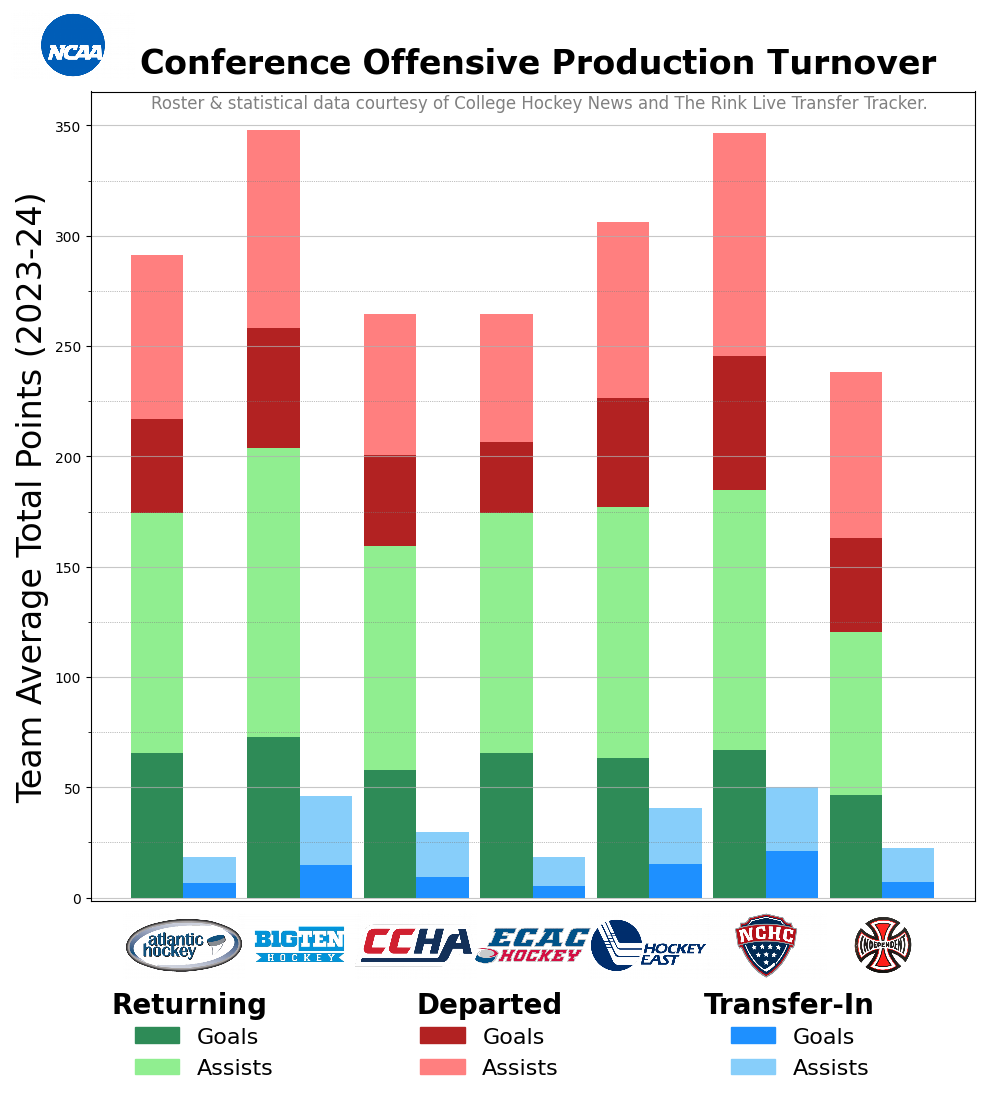

In [265]:
def plot_conference_comparison(df, conferences, logo_mapping, logo_folder, ax=None):
    """
    Function to create a stacked bar chart comparing conference production.
    
    Parameters:
    - df: DataFrame containing team production data.
    - conferences: Dictionary with conference names as keys and lists of team names as values.
    - logo_mapping: Dictionary mapping conferences to their logo filenames.
    - logo_folder: Path to the folder containing the logos.
    - ax: Optional Matplotlib axis object for plotting. If None, a new plot will be created.
    """
    
    # Create a new figure and axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=figure_size)

    # Initialize lists to store the averaged values for each conference
    conference_names = []
    g_returning_avg = []
    a_returning_avg = []
    g_departed_avg = []
    a_departed_avg = []
    incoming_g_avg = []
    incoming_a_avg = []
    
    # Loop through each conference and calculate the averages
    for conference_name, teams in conferences.items():
        filtered_df = df[df['Team'].isin(teams)]
        conference_names.append(conference_name)
        
        # Calculate the averages for each conference
        g_returning_avg.append(filtered_df['g_Returning'].mean())
        a_returning_avg.append(filtered_df['a_Returning'].mean())
        g_departed_avg.append(filtered_df['g_Departed'].mean())
        a_departed_avg.append(filtered_df['a_Departed'].mean())
        incoming_g_avg.append(filtered_df['incoming_g'].mean())
        incoming_a_avg.append(filtered_df['incoming_a'].mean())

    # Define bar width
    bar_width = 0.45
    
    # Plot the first stack (returning and departed goals/assists)
    bottom_values = np.zeros(len(conference_names))
    bars1 = ax.bar(conference_names, g_returning_avg, bottom=bottom_values, color=color_scheme['Returning Goals'], width=bar_width, label='Goals Returning')
    bottom_values += g_returning_avg
    bars2 = ax.bar(conference_names, a_returning_avg, bottom=bottom_values, color=color_scheme['Returning Assists'], width=bar_width, label='Assists Returning')
    bottom_values += a_returning_avg
    bars3 = ax.bar(conference_names, g_departed_avg, bottom=bottom_values, color=color_scheme['Departed Goals'], width=bar_width, label='Goals Departed')
    bottom_values += g_departed_avg
    bars4 = ax.bar(conference_names, a_departed_avg, bottom=bottom_values, color=color_scheme['Departed Assists'], width=bar_width, label='Assists Departed')

    # Plot the second stack (incoming goals/assists)
    x_positions = np.arange(len(conference_names)) + bar_width  # Shift for the second stack
    bars5 = ax.bar(x_positions, incoming_g_avg, color=color_scheme['New Goals'], width=bar_width, label='Goals Incoming')
    bars6 = ax.bar(x_positions, incoming_a_avg, bottom=incoming_g_avg, color=color_scheme['New Assists'], width=bar_width, label='Assists Incoming')

    # Customize the plot
    fig.text(0.15, 0.925, 'Conference Offensive Production Turnover', fontdict=font_properties)

    # Add note with data sources under the title
    fig.text(0.55, 0.89, 
            "Roster & statistical data courtesy of College Hockey News and The Rink Live Transfer Tracker.", 
            ha='center', fontsize=12, color='gray')

    ax.set_ylabel('Team Average Total Points (2023-24)', fontsize=24)
    ax.set_xticks(np.arange(len(conference_names)) + bar_width / 2)
    ax.set_xticklabels(conference_names, fontsize=16)

    # Expand y-axis to allow space for the logos below the bars
    ax.set_ylim(-1.5, ax.get_ylim()[1])  # Adjust this if needed to give more space below

    # Add conference logos as x-tick labels
    add_logos_to_plot(None, conference_names, logo_mapping, logo_folder, ax, bar_width)
    
    # Add the NCAA logo to the upper-left-hand corner
    ncaa_logo_path = os.path.join(logo_folder, 'ncaa_1.png')
    img = Image.open(ncaa_logo_path)
    img_width, img_height = img.size
    aspect_ratio = img_width / img_height
    # Set a fixed height and calculate zoom to preserve aspect ratio
    desired_height = 50  # Adjust the height as needed
    zoom_factor = desired_height / img_height
    # Create an OffsetImage for the NCAA logo
    imagebox = OffsetImage(img, zoom=zoom_factor)
    
    # Add the logo to the upper-left-hand corner of the plot
    ab = AnnotationBbox(imagebox, (0.05, 1.1), xycoords='axes fraction',
                        box_alignment=(1, 1), pad=0.1, frameon=False)
    ax.add_artist(ab)

        # Add and Adjust grid marks
    ax.yaxis.grid(True, linestyle='-', alpha=0.7)
    # add minor grid marks ever 25 points
    ax.yaxis.set_minor_locator(plt.MultipleLocator(25))
    ax.yaxis.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    

    ###########################
    ### CUSTOM LEGEND ###
############################
    # Creating the patches for the legend
    legend_patches = [
        mpatches.Patch(color=color_scheme['Returning Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['Returning Assists'], label='Assists'),
        mpatches.Patch(color=color_scheme['Departed Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['Departed Assists'], label='Assists'),
        mpatches.Patch(color=color_scheme['New Goals'], label='Goals'),
        mpatches.Patch(color=color_scheme['New Assists'], label='Assists')
    ]

    legend_header_size = 20
    legend_label_font = 16
    
    # Custom grid legend layout using text and patches
    fig.text(0.2, -0.015, 'Returning', fontsize=legend_header_size, weight='bold', ha='center')
    fig.text(0.5, -0.015, 'Departed', fontsize=legend_header_size, weight='bold', ha='center')
    fig.text(0.8, -0.015, 'Transfer-In', fontsize=legend_header_size, weight='bold', ha='center')


    # Adjust legend placement to be centered under the headers
    fig.legend(handles=legend_patches[:2], loc='lower left', bbox_to_anchor=(0.125, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Returning'
    fig.legend(handles=legend_patches[2:4], loc='lower center', bbox_to_anchor=(0.5, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Departed'
    fig.legend(handles=legend_patches[4:], loc='lower right', bbox_to_anchor=(0.9, -0.1), frameon=False, fontsize=legend_label_font)  # Goals/Assists under 'Transfers-In'
    ############################
    ### CUSTOM LEGEND ###
    ############################
    # # Creating the patches for the legend
    # legend_patches = [
    #     mpatches.Patch(color=color_scheme['Returning Goals'], label='Goals Returning'),
    #     mpatches.Patch(color=color_scheme['Returning Assists'], label='Assists Returning'),
    #     mpatches.Patch(color=color_scheme['Departed Goals'], label='Goals Departed'),
    #     mpatches.Patch(color=color_scheme['Departed Assists'], label='Assists Departed'),
    #     mpatches.Patch(color=color_scheme['New Goals'], label='Goals Incoming'),
    #     mpatches.Patch(color=color_scheme['New Assists'], label='Assists Incoming')
    # ]

    # # Adjust legend placement
    # fig.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.1), frameon=False, fontsize=16)

    # Remove xtick labels and xticks
    ax.set_xticks([])
    ax.set_xticklabels([])

    # Save and display the plot
    output_file = os.path.join(temp_folder, 'conference_comparison_production_turnover.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

conferences = {
    'Atlantic': ['Air Force', 'American Intl', 'Army', 'Bentley', 'Canisius', 'Holy Cross', 'Mercyhurst', 'Niagara', 'RIT', 'Robert Morris', 'Sacred Heart'],
    'Big Ten': ['Michigan', 'Michigan State', 'Minnesota', 'Notre Dame', 'Ohio State', 'Penn State', 'Wisconsin'],
    'CCHA': ['Augustana', 'Bemidji State', 'Bowling Green', 'Ferris State', 'Lake Superior', 'Michigan Tech', 'Minnesota State', 'Northern Michigan', 'St Thomas'],
    'ECAC': ['Brown', 'Clarkson', 'Colgate', 'Cornell', 'Dartmouth', 'Harvard', 'Princeton', 'Quinnipiac', 'Rensselaer', 'St Lawrence', 'Union', 'Yale'],
    'Hockey East': ['Boston College', 'Boston University', 'Connecticut', 'Maine', 'Massachusetts', 'Mass Lowell', 'Merrimack', 'New Hampshire', 'Northeastern', 'Providence', 'Vermont'],
    'NCHC': ['Arizona State', 'Colorado College', 'Denver', 'Miami', 'Minnesota Duluth', 'North Dakota', 'Omaha', 'St Cloud State', 'Western Michigan'],
    'Independents': ['Alaska Anchorage', 'Alaska', 'Lindenwood', 'Long Island', 'Stonehill']
}

conference_logo_mapping = {
    'Atlantic': 'atlantic.png',
    'Big Ten': 'big_ten.png',
    'CCHA': 'ccha.png',
    'ECAC': 'ecac_scaled.png',
    'Hockey East': 'hockey_east.png',
    'NCHC': 'nchc.png',
    'Independents': 'independent_scaled.png'
}

conf_logo_folder = os.path.join('..', 'images', 'logos', 'conference')

plot_conference_comparison(df, conferences, conference_logo_mapping, conf_logo_folder)

In [266]:
# Create a new list with every team from the conference lists
all_teams = []
for teams in conferences.values():
    all_teams.extend(teams)

# Print the unique teams to verify
print("Unique Teams in All Conferences:")
print(set(all_teams))





Unique Teams in All Conferences:
{'Colorado College', 'Clarkson', 'North Dakota', 'Niagara', 'Notre Dame', 'Northern Michigan', 'Ferris State', 'RIT', 'Michigan', 'Miami', 'Rensselaer', 'Mercyhurst', 'Wisconsin', 'Alaska', 'Colgate', 'Massachusetts', 'Northeastern', 'Harvard', 'Long Island', 'Bemidji State', 'Stonehill', 'Penn State', 'Minnesota Duluth', 'St Thomas', 'Denver', 'Mass Lowell', 'Connecticut', 'Bowling Green', 'Cornell', 'Robert Morris', 'Dartmouth', 'Boston University', 'Vermont', 'St Lawrence', 'Arizona State', 'Princeton', 'Lake Superior', 'St Cloud State', 'Yale', 'Quinnipiac', 'Boston College', 'Alaska Anchorage', 'Lindenwood', 'Air Force', 'Army', 'American Intl', 'Maine', 'Omaha', 'Bentley', 'Western Michigan', 'Canisius', 'Holy Cross', 'Michigan State', 'Merrimack', 'New Hampshire', 'Michigan Tech', 'Union', 'Sacred Heart', 'Ohio State', 'Brown', 'Augustana', 'Minnesota', 'Minnesota State', 'Providence'}


### All Teams Plot

In [267]:
figure_size = (15, 10)

# Plot every team on the all teams list
# plot_conference_comparison(df, all_teams, logo_mapping, logo_folder)

#### Original Test code

In [268]:
# ## Call the function to plot all teams in one chart

# figure_size = (15, 10)

# def plot_all_teams(df, all_teams, logo_mapping, logo_folder):
#     """
#     Function to create a stacked bar chart for all teams.

#     Parameters:
#     - df: DataFrame containing team production data.
#     - all_teams: List of all teams.
#     - logo_mapping: Dictionary mapping teams to their logo filenames.
#     - logo_folder: Path to the folder containing the logos.
#     """
    
#     fig, ax = plt.subplots(figsize=figure_size)

#     # Filter the dataframe for all teams
#     filtered_df = df[df['Team'].isin(all_teams)]

#     # Order the teams based on their RK in the pairwise_df
#     filtered_df['Rk'] = filtered_df['Team'].map(pairwise_df.set_index('Team')['Rk'])
#     filtered_df = filtered_df.sort_values(by='Rk')

#     # Extract the data needed for the plot
#     team_names = filtered_df['Team'].tolist()
#     g_returning = filtered_df['g_Returning'].values
#     a_returning = filtered_df['a_Returning'].values
#     g_departed = filtered_df['g_Departed'].values
#     a_departed = filtered_df['a_Departed'].values
#     incoming_g = filtered_df['incoming_g'].values
#     incoming_a = filtered_df['incoming_a'].values

#     # Plot the first stack (returning and departed goals/assists)
#     bottom_values = np.zeros(len(team_names))
#     bar_width = 0.45  # Adjustable bar width for fine-tuning spacing
#     bars1 = ax.bar(team_names, g_returning, bottom=bottom_values, color=color_scheme['Returning Goals'], width=bar_width, label='Goals Returning')
#     bottom_values += g_returning
#     bars2 = ax.bar(team_names, a_returning, bottom=bottom_values, color=color_scheme['Returning Assists'], width=bar_width, label='Assists Returning')
#     bottom_values += a_returning
#     bars3 = ax.bar(team_names, g_departed, bottom=bottom_values, color=color_scheme['Departed Goals'], width=bar_width, label='Goals Departed')
#     bottom_values += g_departed
#     bars4 = ax.bar(team_names, a_departed, bottom=bottom_values, color=color_scheme['Departed Assists'], width=
#     bar_width, label='Assists Departed')

#     # Plot the second stack (incoming goals/assists)
#     x_positions = np.arange(len(team_names)) + bar_width  # Shift for the second stack
#     bars5 = ax.bar(x_positions, incoming_g, color=color_scheme['New Goals'], width=bar_width, label='Goals Incoming')
#     bars6 = ax.bar(x_positions, incoming_a, bottom=incoming_g, color=color_scheme['New Assists'], width
#     =bar_width, label='Assists Incoming')

#     # Customize the plot
#     fig.text(0.35, 0.925, 'Offensive Production Turnover', fontdict=font_properties)

#     # Add note with data sources under the title
#     fig.text(0.65, 0.855, 
#             "Roster & statistical data courtesy of College Hockey News and \nThe Rink Live Transfer Tracker. Teams ordered by final position \nin the 2023-24 Pairwise Ranking", 
#             ha='center', fontsize=12, color='gray')

#     ax.set_ylabel('Total Points (2023-24)', fontsize=24) #, weight='bold')
#     ax.set_xticks(np.arange(len(team_names)) + bar_width / 2)
#     ax.set_xticklabels(team_names, fontsize=16)

#     # Expand y-axis to allow space for the logos below the bars
#     ax.set_ylim(-1.5, ax.get_ylim()[1])  # Adjust this if needed to give more space below

#     # Add logos using corrected x-axis positions and team names, passing bar_width
#     add_logos_to_plot(filtered_df, team_names, logo_mapping, logo_folder, ax, bar_width)

#     # Add and Adjust grid marks
#     ax.yaxis.grid(True, linestyle='-', alpha=0.7)
#     # add minor grid marks ever 25 points
#     ax.yaxis.set_minor_locator(plt.MultipleLocator(25))
#     ax.yaxis.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
#     # Remove x-ticks and labels
#     ax.set_xticks([])
#     ax.set_xticklabels([])
    
#     # Save the output image to the TEMP folder
#     output_file = os.path.join(temp_folder, 'all_teams_production_turnover.png')
#     plt.savefig(output_file, bbox_inches='tight')

#     # Display the plot
#     plt.tight_layout()
#     plt.show()


# # Filter to the top 20 teams in pairwise ranking
# # top_teams = pairwise_df.head(20)['Team'].tolist()
# # df = df[df['Team'].isin(top_teams)]

# # Filter the dataframe for for teams 21-40
# # top_teams_21_40 = pairwise_df.iloc[20:40]['Team'].tolist()
# # df_21_40 = df[df['Team'].isin(top_teams_21_40)]

# # Filter to the teams outside the top 40
# # bottom_teams = pairwise_df.iloc[40:]['Team'].tolist()
# # df_bottom_teams = df[df['Team'].isin(bottom_teams)]

# # Plot all teams in one super wide chart
# figure_size = (45, 10)

# plot_all_teams(df, all_teams, logo_mapping, logo_folder)







# # Call the function to plot all teams in one chart
# # plot_all_teams(df, top_teams, logo_mapping, logo_folder)
# # plot_all_teams(df_21_40, top_teams_21_40, logo_mapping, logo_folder)
# # plot_all_teams(df_bottom_teams, bottom_teams, logo_mapping, logo_folder)

# # print(df_21_40)


    


### Vertical Plot

In [273]:
## Create a verticle plot for all teams, order the teams by pairwise ranking

def plot_all_teams_vertical(df_sorted, all_teams, logo_mapping, logo_folder):
    """
    Function to create a vertical stacked bar chart for all teams.

    Parameters:
    - df: DataFrame containing team production data.
    - all_teams: List of all teams.
    - logo_mapping: Dictionary mapping teams to their logo filenames.
    - logo_folder: Path to the folder containing the logos.
    """
    
    fig, ax = plt.subplots(figsize=(10, 20))

    filtered_df = df_sorted

    # Extract the data needed for the plot
    team_names = filtered_df['Team'].tolist()
    g_returning = filtered_df['g_Returning'].values
    a_returning = filtered_df['a_Returning'].values
    g_departed = filtered_df['g_Departed'].values
    a_departed = filtered_df['a_Departed'].values
    incoming_g = filtered_df['incoming_g'].values
    incoming_a = filtered_df['incoming_a'].values

    # Plot the first stack (returning and departed goals/assists)
    bottom_values = np.zeros(len(team_names))
    bar_width = 0.45  # Adjustable bar width for fine-tuning spacing
    bars1 = ax.barh(team_names, g_returning, left=bottom_values, color=color_scheme['Returning Goals'], label='Goals Returning')
    bottom_values += g_returning
    bars2 = ax.barh(team_names, a_returning, left=bottom_values, color=color_scheme['Returning Assists'], label='Assists Returning')
    bottom_values += a_returning

    bars3 = ax.barh(team_names, g_departed, left=bottom_values, color=color_scheme['Departed Goals'], label='Goals Departed')
    bottom_values += g_departed
    bars4 = ax.barh(team_names, a_departed, left=bottom_values, color=color_scheme['Departed Assists'], label='Assists Departed')

    # Plot the second stack (incoming goals/assists)
    x_positions = np.arange(len(team_names)) + bar_width  # Shift for the second stack
    bars5 = ax.barh(team_names, incoming_g, left=bottom_values, color=color_scheme['New Goals'], label='Goals Incoming')


    bars6 = ax.barh(team_names, incoming_a, left=incoming_g, color=color_scheme['New Assists'], label='Assists Incoming')

    # Customize the plot
    # fig.text(0.35, 0.925, 'Offensive Production Turnover', fontdict=font_properties)
    # Add title
    ax.set_title('Offensive Production Turnover', fontsize=24, weight='bold', loc='center', pad=20)

    # Add note with data sources under the title
    fig.text(0.5, 1, 
            "Roster & statistical data courtesy of College Hockey News and \nThe Rink Live Transfer Tracker. Teams ordered by final position \nin the 2023-24 Pairwise Ranking", 
            ha='center', fontsize=12, color='gray')

    ax.set_xlabel('Total Points (2023-24)', fontsize=24) #, weight='bold')
    ax.set_yticks(np.arange(len(team_names)))

    # Expand y-axis to allow space for the logos below the bars
    ax.set_xlim(-1.5, ax.get_xlim()[1])  # Adjust this if needed to give more space below

    # Add logos using corrected x-axis positions and team names, passing bar_width
    add_logos_to_plot(filtered_df, team_names, logo_mapping, logo_folder, ax, bar_width)

    # Add and Adjust grid marks
    ax.xaxis.grid(True, linestyle='-', alpha=0.7)
    # add minor grid marks ever 25 points
    ax.xaxis.set_minor_locator(plt.MultipleLocator(25))

    # Remove y-ticks and labels
    ax.set_yticks([])
    ax.set_yticklabels([])

    # Save the output image to the TEMP folder
    output_file = os.path.join(temp_folder, 'all_teams_vertical_production_turnover.png')
    plt.savefig(output_file, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Sort the teams by pairwise ranking
df_sorted = df[df['Team'].isin(all_teams)]
df_sorted['Rk'] = df_sorted['Team'].map(pairwise_df.set_index('Team')['Rk'])

df_sorted.head()

# Output list of teams from df_sorted to a list called sorted_teams
sorted_teams = df_sorted['Team'].tolist()
# plot_all_teams_vertical(df_sorted, sorted_teams, logo_mapping, logo_folder)  # Call the function to plot all teams in one vertical chart

print(sorted_teams)


['Boston College', 'Boston University', 'Denver', 'Michigan State', 'Maine', 'North Dakota', 'Minnesota', 'Wisconsin', 'Quinnipiac', 'Michigan', 'Omaha', 'Cornell', 'Western Michigan', 'Massachusetts', 'Colorado College', 'Providence', 'St Cloud State', 'New Hampshire', 'Northeastern', 'Arizona State', 'RIT', 'Notre Dame', 'Penn State', 'Connecticut', 'Alaska', 'Ohio State', 'Holy Cross', 'Dartmouth', 'Minnesota Duluth', 'Bemidji State', 'Michigan Tech', 'Vermont', 'Minnesota State', 'Merrimack', 'Colgate', 'Clarkson', 'Union', 'Alaska Anchorage', 'Augustana', 'Mass Lowell', 'Niagara', 'St Lawrence', 'Bentley', 'Air Force', 'Lake Superior', 'St Thomas', 'Northern Michigan', 'Miami', 'Harvard', 'Yale', 'Long Island', 'Sacred Heart', 'Rensselaer', 'Princeton', 'Bowling Green', 'Army', 'Canisius', 'Mercyhurst', 'Robert Morris', 'Brown', 'Lindenwood', 'Ferris State', 'Stonehill', 'American Intl']


In [270]:
figure_size = (18, 40)  # Adjusted to give more horizontal space for bars and logos

# Ensure that teams are ordered by their pairwise ranking
df = df.merge(pairwise_df[['Team', 'Rk']], on='Team', how='left')
# Sort by rank
df = df.sort_values(by='Rk')

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def add_logos_to_plot_vert(data_df, team_names, logo_mapping, logo_folder, ax, bar_height):
    """
    Add team logos next to the horizontal bars in the plot.

    Parameters:
    - data_df: DataFrame containing team production data.
    - team_names: List of team names in the plot.
    - logo_mapping: Dictionary mapping teams to their logo filenames.
    - logo_folder: Path to the folder containing the logos.
    - ax: Matplotlib Axes object for the plot.
    - bar_height: Height of the bars for correct logo placement.
    """
    for i, team in enumerate(team_names):
        logo_file = logo_mapping.get(team, "")
        if logo_file:
            logo_path = os.path.join(logo_folder, logo_file)
            try:
                # Read the logo image
                logo_img = plt.imread(logo_path)
                imagebox = OffsetImage(logo_img, zoom=0.2)  # Adjust zoom as needed

                # Adjust the positioning of logos to the right of the bars
                x_position = ax.get_xlim()[1] + 10  # Set logos to the right of the bars
                y_position = i  # Align with the team's bar

                # Create an AnnotationBbox for the logo
                ab = AnnotationBbox(imagebox, (x_position, y_position), xycoords='data', frameon=False)
                ax.add_artist(ab)
            except Exception as e:
                print(f"Error adding logo for {team}: {e}")

def plot_all_teams(df, all_teams, logo_mapping, logo_folder):
    """
    Function to create a vertical stacked bar chart for all teams.

    Parameters:
    - df: DataFrame containing team production data.
    - all_teams: List of all teams.
    - logo_mapping: Dictionary mapping teams to their logo filenames.
    - logo_folder: Path to the folder containing the logos.
    """
    
    fig, ax = plt.subplots(figsize=figure_size)

    # Filter the dataframe for all teams and order by 'Rk'
    filtered_df = df[df['Team'].isin(all_teams)].sort_values(by='Rk')

    # Extract the data needed for the plot
    team_names = filtered_df['Team'].tolist()
    g_returning = filtered_df['g_Returning'].values
    a_returning = filtered_df['a_Returning'].values
    g_departed = filtered_df['g_Departed'].values
    a_departed = filtered_df['a_Departed'].values
    incoming_g = filtered_df['incoming_g'].values
    incoming_a = filtered_df['incoming_a'].values

    # Plot all stats in a single vertical stacked bar
    bottom_values = np.zeros(len(team_names))
    bar_height = 0.7  # Reduced bar height to prevent crowding
    
    # Stack each category in one vertical bar per team
    bars1 = ax.barh(team_names, g_returning, left=bottom_values, color=color_scheme['Returning Goals'], height=bar_height, label='Goals Returning')
    bottom_values += g_returning
    bars2 = ax.barh(team_names, a_returning, left=bottom_values, color=color_scheme['Returning Assists'], height=bar_height, label='Assists Returning')
    bottom_values += a_returning
    bars3 = ax.barh(team_names, g_departed, left=bottom_values, color=color_scheme['Departed Goals'], height=bar_height, label='Goals Departed')
    bottom_values += g_departed
    bars4 = ax.barh(team_names, a_departed, left=bottom_values, color=color_scheme['Departed Assists'], height=bar_height, label='Assists Departed')
    bottom_values += a_departed
    bars5 = ax.barh(team_names, incoming_g, left=bottom_values, color=color_scheme['New Goals'], height=bar_height, label='Goals Incoming')
    bottom_values += incoming_g
    bars6 = ax.barh(team_names, incoming_a, left=bottom_values, color=color_scheme['New Assists'], height=bar_height, label='Assists Incoming')

    # Customize the plot
    fig.text(0.5, 1.0, 'Offensive Production Turnover', fontdict=font_properties, ha='center')

    # Add note with data sources under the title
    fig.text(0.5, 0.975, 
            "Roster & statistical data courtesy of College Hockey News and \nThe Rink Live Transfer Tracker. Teams ordered by final position \nin the 2023-24 Pairwise Ranking", 
            ha='center', fontsize=12, color='gray')

    ax.set_xlabel('Total Points (2023-24)', fontsize=24)  # Adjusted x-axis label
    ax.set_yticks(np.arange(len(team_names)))
    ax.set_yticklabels(team_names, fontsize=16)

    # Adjust x-axis limits for better spacing
    ax.set_xlim(0, ax.get_xlim()[1] + 50)  # Increase x-axis to allow space for logos

    # Add logos to the plot using corrected y-axis positions and team names
    add_logos_to_plot_vert(filtered_df, team_names, logo_mapping, logo_folder, ax, bar_height)

    # Add and adjust grid marks
    ax.xaxis.grid(True, linestyle='-', alpha=0.7)
    ax.xaxis.set_minor_locator(plt.MultipleLocator(25))  # Minor gridlines every 25 points
    ax.xaxis.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

    # Save the output image
    output_file = os.path.join(temp_folder, 'all_teams_production_turnover_vertical.png')
    plt.savefig(output_file, bbox_inches='tight')

    # Display the plot
    plt.tight_layout()
    plt.show()


In [271]:
# filtered_df.head()

df.head()


,Team,g_Returning,a_Returning,g_Departed,a_Departed,incoming_g,incoming_a,incoming_pts,incoming_sh,incoming_pim,incoming_games_played,Rk
9,Boston College,98,203,85,120,2.0,6.0,8.0,36.0,16.0,27.0,1.0
10,Boston University,70,127,93,159,7.0,29.0,36.0,100.0,87.0,64.0,2.0
20,Denver,129,195,73,159,18.0,23.0,41.0,197.0,53.0,67.0,3.0
34,Michigan State,102,175,45,89,6.0,19.0,25.0,91.0,49.0,71.0,4.0
27,Maine,75,137,44,65,19.0,30.0,49.0,212.0,62.0,112.0,5.0


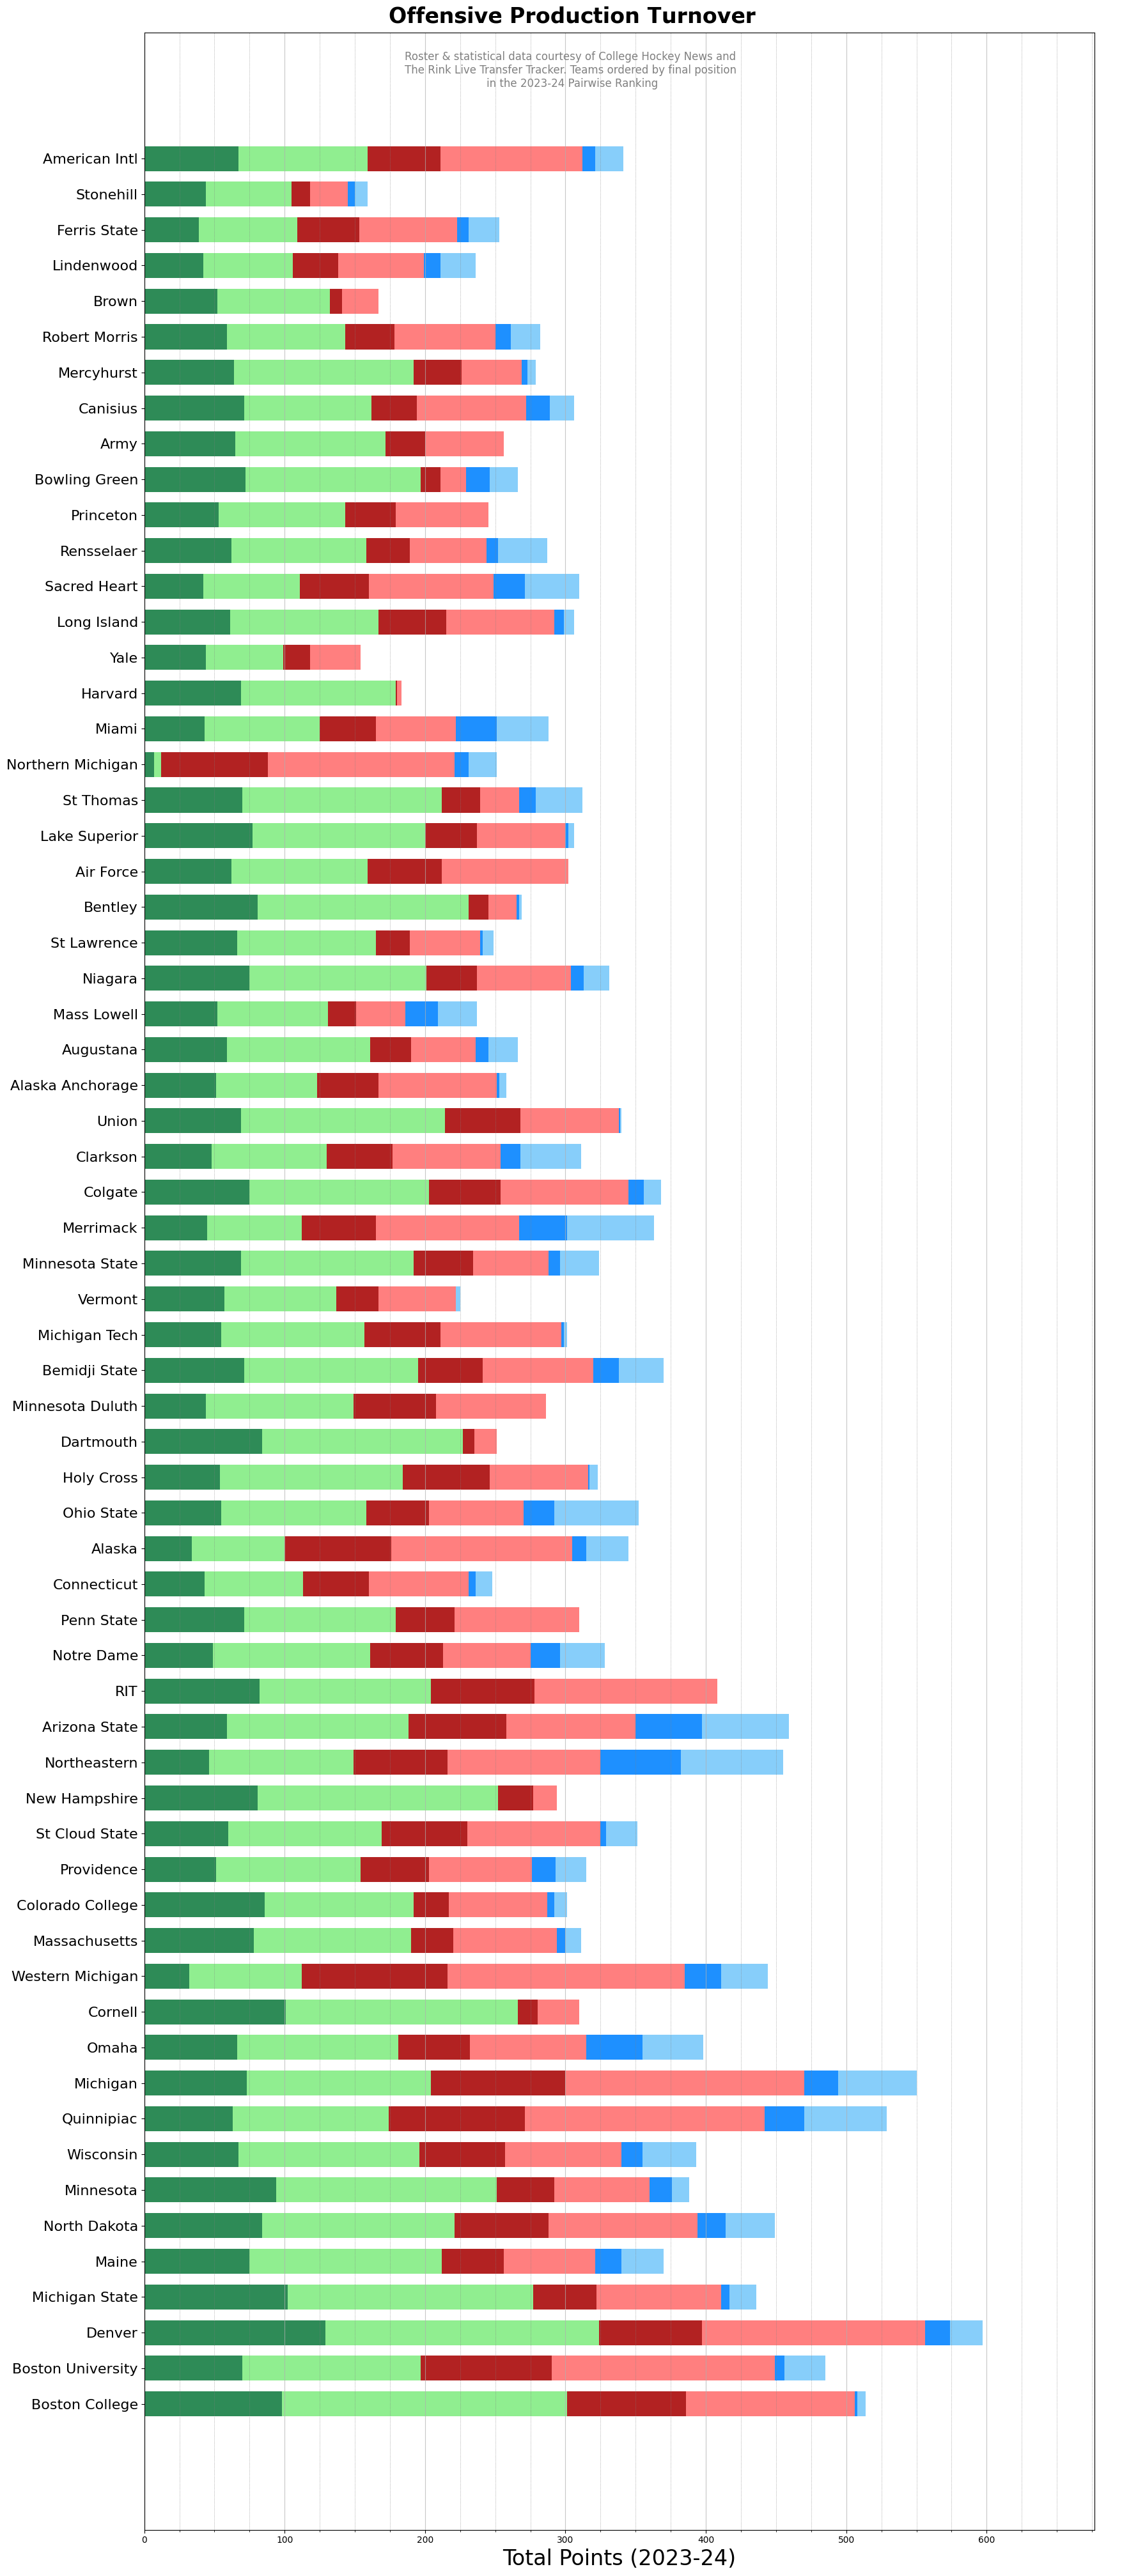

In [272]:
# Run all teams plot
plot_all_teams(df, all_teams, logo_mapping, logo_folder)
